<h1>Tugas 2 Digital Signal Processing</h1>
Bintang Fikri Fauzan <br>
122140008

<h3>I. Simulasi Sinyal PPG (Photoplethysmography)</h3>

In [3]:
# Import Library yang digunakan
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import scipy.signal as signal

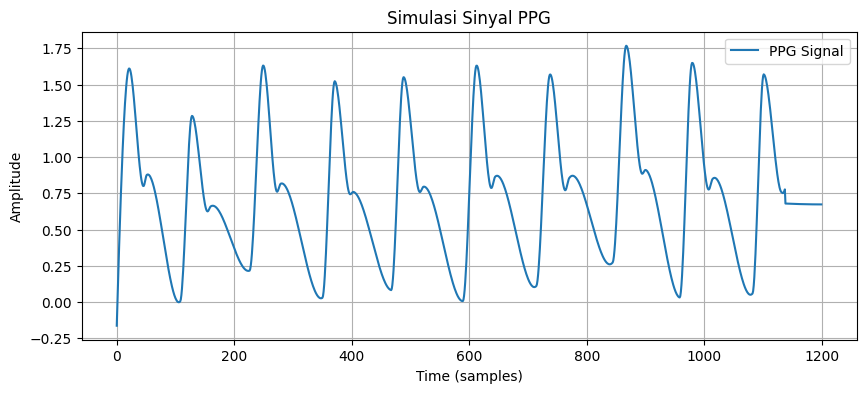

In [4]:
# Deklarasi variabel untuk simulasi PPG
# Simulasi sinyal PPG dengan durasi 8 detik (nim akhir 008), frekuensi sampling 150 Hz, dan detak jantung 80 bpm
# Menggunakan random_state menyesuaikan tanggal lahir penulis (23 Maret 2004)
duration = 8  # durasi dalam detik
sampling_rate = 150  # frekuensi sampling dalam Hz
heart_rate = 80  # detak jantung dalam bpm
random_state = 200423  # tanggal lahir penulis
noise = 0.08 # nim akhir 008

# Simulasi sinyal PPG dengan noise
ppg = nk.ppg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=heart_rate, 
                      ibi_randomness=noise, random_state=random_state)

# Plot sinyal PPG
plt.figure(figsize=(10, 4))
plt.plot(ppg, label="PPG Signal")
plt.title("Simulasi Sinyal PPG")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


<h4>A. Downsampling Sinyal PPG<h4>

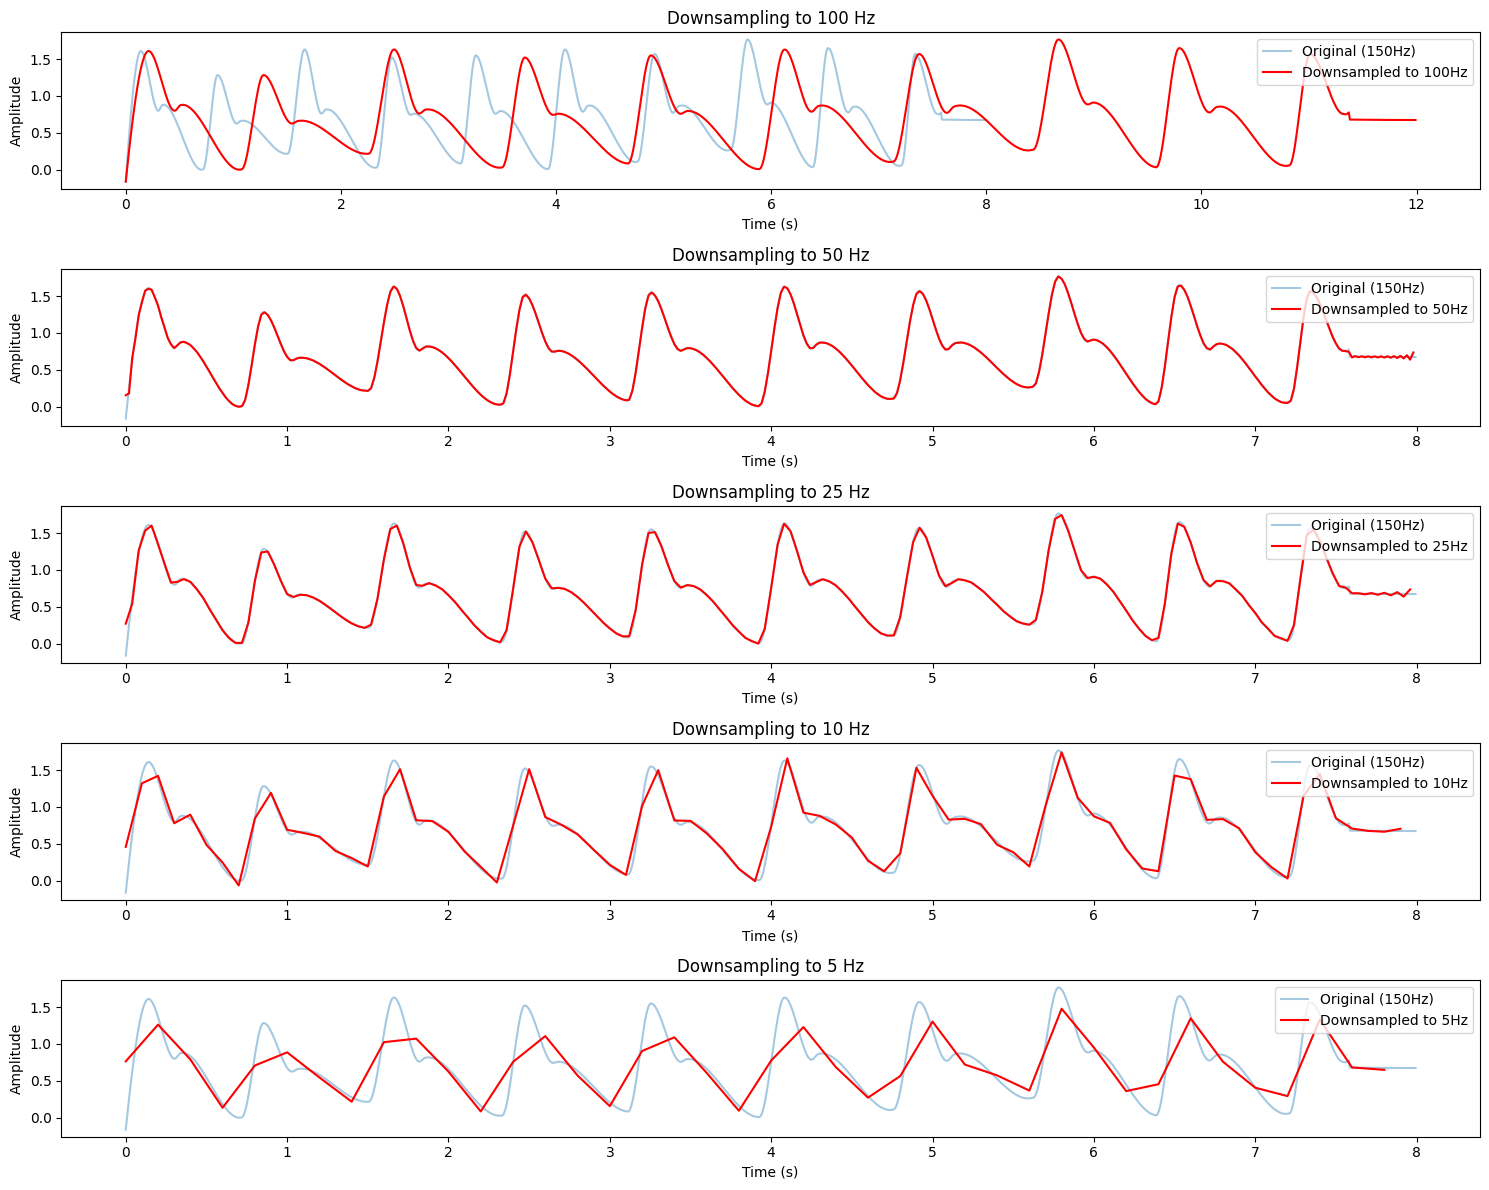

In [5]:
# Downsampling sinyal PPG untuk mengurangi frekuensi sampling menjadi 100Hz, 50Hz, 25Hz, 10Hz, dan 5Hz)
sampling_rate = 150
time = [i / sampling_rate for i in range(len(ppg))]

# Plot fungsi
def plot_downsampling(ppg, sampling_rate, rates):
    plt.figure(figsize=(15, 12))
    for i, r in enumerate(rates):
        factor = int(sampling_rate / r)
        if factor < 1: continue
        ppg_down = signal.resample(ppg, int(len(ppg) / factor))
        t_down = [i / r for i in range(len(ppg_down))]

        plt.subplot(len(rates), 1, i+1)
        plt.plot(time, ppg, label="Original (150Hz)", alpha=0.4)
        plt.plot(t_down, ppg_down, label=f"Downsampled to {r}Hz", color='red')
        plt.legend(loc='upper right')
        plt.title(f'Downsampling to {r} Hz')
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Frekuensi yang ingin diuji
fs_list = [100, 50, 25, 10, 5]

# Panggil fungsi untuk menampilkan hasil downsampling
plot_downsampling(ppg, sampling_rate, fs_list)


<h5>Penjelasan Downsampling</h5>
<p>Berdasarkan hasil downsampling dari 150Hz ke berbagai frekuensi seperti 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz, tampak bahwa semakin rendah <i>sampling frequency</i>, maka sinyal makin terlihat lebih kasar. Hal ini membuktikan terjadinya aliasing, yaitu ketika sinyal disampling dengan frekuensi yang lebih rendah dari dua kali frekuensi tertinggi sinyal sehingga bentuk aslinya jadi tidak bisa direkonstruksi dengan baik. Jadi, dari percobaan ini bisa disimpulkan bahwa downsampling yang terlalu rendah bisa menyebabkan distorsi sinyal, dan itu terjadi karena efek aliasing.</p>

<h4>B. Nilai Order pada Proses Filtering</h4>

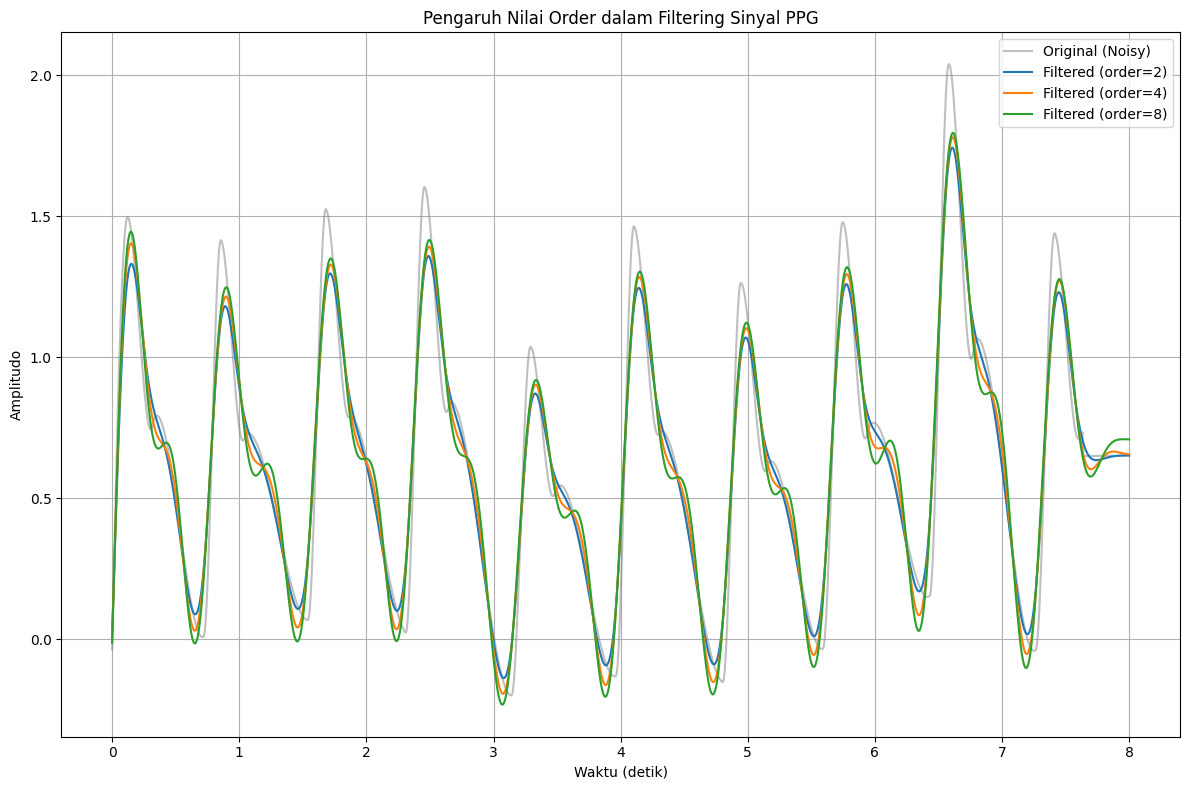

In [6]:
from scipy.signal import butter, filtfilt

# Parameter simulasi sinyal
duration = 8  # detik
sampling_rate = 150  # Hz
noise = 0.08
heart_rate = 80
random_state = 40323  # tanggal lahir penulis (23 Maret 2004) dalam format YYMMDD

# Simulasi sinyal PPG
ppg = nk.ppg_simulate(duration=duration, sampling_rate=sampling_rate,
                      heart_rate=heart_rate, ibi_randomness=noise, random_state=random_state)
time = np.linspace(0, duration, len(ppg))

# Fungsi filter lowpass Butterworth
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Bandingkan filter dengan berbagai order
cutoff = 3.0  # Hz
orders = [2, 4, 8]

plt.figure(figsize=(12, 8))
plt.plot(time, ppg, label="Original (Noisy)", color='gray', alpha=0.5)

for order in orders:
    filtered = butter_lowpass_filter(ppg, cutoff=cutoff, fs=sampling_rate, order=order)
    plt.plot(time, filtered, label=f'Filtered (order={order})')

plt.title("Pengaruh Nilai Order dalam Filtering Sinyal PPG")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h5>Penjelasan Parameter Order</h5>
<p>Dalam proses pengolahan sinyal, kadang kita perlu membersihkan sinyal dari gangguan atau noise. Salah satu cara yang digunakan adalah filtering. Saat melakukan filtering, biasanya kita akan diminta menentukan nilai order dari filter tersebut. Nilai order ini bisa diibaratkan seperti tingkat ketajaman filter dalam memisahkan sinyal yang "baik" dan sinyal yang "mengganggu". Jika nilai Order kecil, filter bekerja dengan lebih halus namun kurang efektif menyaring noise, sebaliknya jika nilai Order besar, maka filter lebih tajam yang menyebabkan distorsi namun lebih efektif menyaring noise.

Dari sini dapat disimpulkan bahwa pemilihan order tidak hanya berdasarkan besar atau kecil, namun disesuaikan dengan kebutuhan. Baik ingin sinyal tetap halus atau bersih dari noise.
</p>

<h3>II. Eksperimen Filter Band-pass</h3>

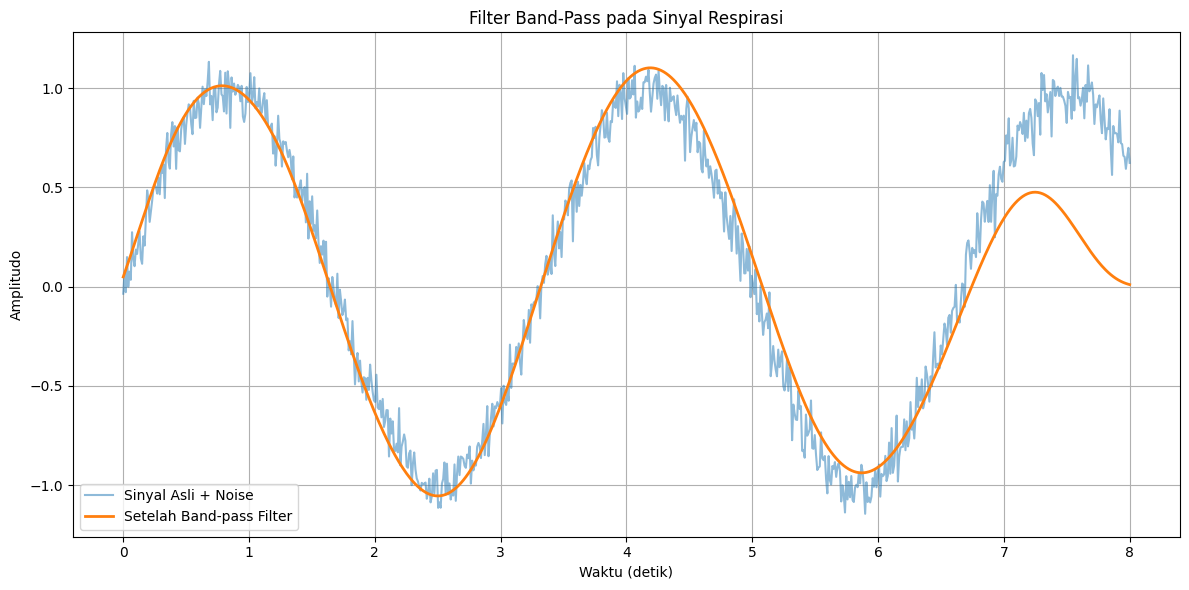

In [7]:
from scipy.signal import butter, filtfilt

# Parameter simulasi
duration = 8  # detik (berdasarkan 3 digit terakhir NIM)
sampling_rate = 100  # Hz
noise = 0.08  # (0.<2 digit terakhir NIM>)
respiratory_rate = 18  # Breath Per Minute
random_state = 40323  # Format YYMMDD dari 23 Maret 2004

# Buat sinyal waktu
np.random.seed(random_state)
time = np.linspace(0, duration, int(sampling_rate * duration))

# Buat sinyal respirasi (frekuensi = BPM / 60)
frequency = respiratory_rate / 60  # Hz
signal = np.sin(2 * np.pi * frequency * time)

# Tambahkan noise
noisy_signal = signal + noise * np.random.normal(size=len(time))

# Fungsi band-pass filter Butterworth
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Terapkan band-pass filter (misalnya 0.1 Hz - 1 Hz, rentang napas manusia)
filtered_signal = bandpass_filter(noisy_signal, lowcut=0.1, highcut=1.0, fs=sampling_rate)

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(time, noisy_signal, label='Sinyal Asli + Noise', alpha=0.5)
plt.plot(time, filtered_signal, label='Setelah Band-pass Filter', linewidth=2)
plt.title("Filter Band-Pass pada Sinyal Respirasi")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h5>Penjelasan Filter Band-Pass</h5>
<p>Pada eksperimen ini, saya melakukan simulasi sinyal respirasi (pernapasan) untuk memahami bagaimana filter band-pass bekerja dalam memproses sinyal biologis. Karena tidak tersedia fungsi khusus untuk mensimulasikan sinyal respirasi seperti pada sinyal PPG, maka saya membuat sinyal napas secara manual dalam bentuk gelombang sinus.</p>
<p>Parameter simulasi disesuaikan dengan ketentuan soal:
<li>Durasi sinyal diatur selama 8 detik (berdasarkan 3 digit terakhir NIM).</li>
<li>Sampling rate adalah 100 Hz.</li>
<li>Frekuensi napas berdasarkan respiratory rate 18 BPM, atau sekitar 0.3 Hz.</li>
<li>Noise ditambahkan sebesar 0.08.</li>
<li>Random seed ditetapkan dengan format YYMMDD dari tanggal lahir saya: 23 Maret 2004.</li>
</p>
<p>Sinyal tersebut kemudian ditambahkan noise acak agar menyerupai sinyal riil yang biasanya terpengaruh oleh gangguan lingkungan atau sensor. Untuk membersihkan sinyal tersebut, saya merancang filter band-pass Butterworth menggunakan library scipy.signal.butter.

Filter ini dirancang untuk melewatkan frekuensi antara 0.1 Hz hingga 1.0 Hz, yaitu rentang umum dari frekuensi pernapasan manusia. Dengan menyaring sinyal hanya pada rentang tersebut, saya bisa menghilangkan gangguan dari frekuensi yang tidak relevan (baik yang terlalu rendah maupun terlalu tinggi).

Hasil visualisasi menunjukkan bahwa sinyal hasil filtering menjadi jauh lebih halus dan menyerupai gelombang napas yang ideal. Dibandingkan sinyal awal yang penuh noise, sinyal yang sudah difilter lebih mudah dianalisis karena sudah bersih dari gangguan luar.

Melalui eksperimen ini, saya memahami bahwa filter band-pass sangat penting dalam pengolahan sinyal biologis untuk mengekstrak informasi yang benar-benar relevan sesuai dengan frekuensinya.</p>

<h3>III. Filter Audio Sederhana</h3>

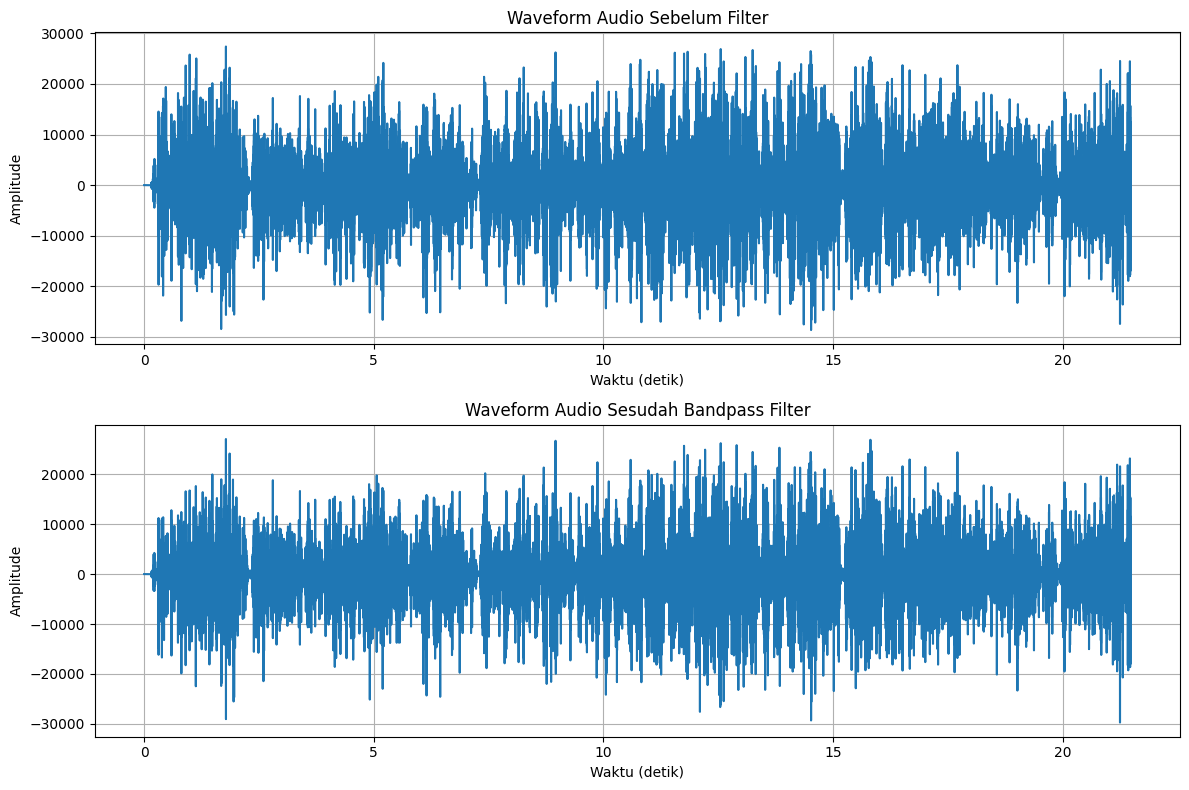

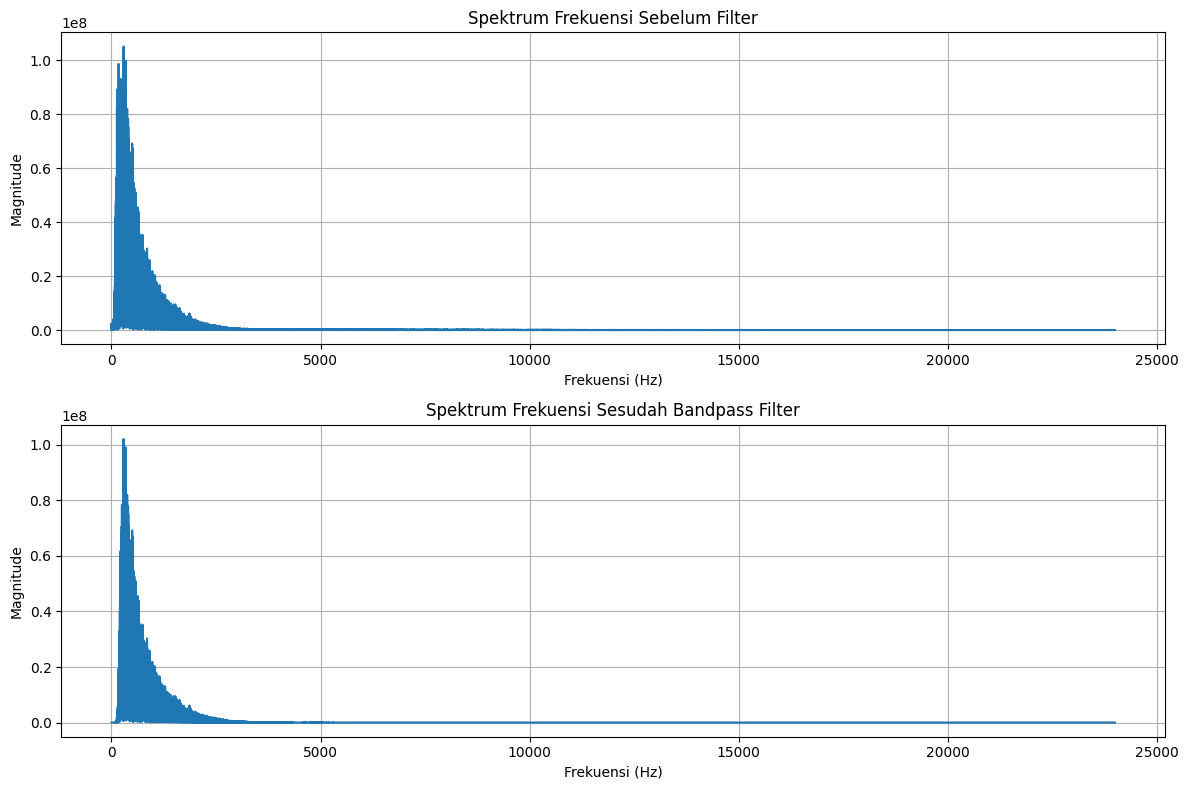

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter, sosfilt, sosfreqz
from scipy.fft import fft, fftfreq

# 1. Load audio file (.wav)
sample_rate, audio = wavfile.read('voice.wav') 

# Jika stereo, ubah ke mono
if audio.ndim > 1:
    audio = audio.mean(axis=1)

# 2. Bandpass Filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# 3. Tentukan cutoff frekuensi
lowcut = 200 
highcut = 3400

filtered_audio = bandpass_filter(audio, lowcut, highcut, sample_rate)

# 4. Visualisasi Waveform
def plot_waveform(signal, fs, title):
    t = np.linspace(0, len(signal)/fs, num=len(signal))
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel('Waktu (detik)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# 5. Visualisasi FFT
def plot_fft(signal, fs, title):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N//2]
    
    plt.figure(figsize=(10, 4))
    plt.plot(xf, np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

# Plot waveform sebelum dan sesudah filter
plt.figure(figsize=(12, 8))

# Subplot untuk waveform sebelum filter
plt.subplot(2, 1, 1)
t = np.linspace(0, len(audio) / sample_rate, num=len(audio))
plt.plot(t, audio)
plt.title('Waveform Audio Sebelum Filter')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitude')
plt.grid()

# Subplot untuk waveform setelah filter
plt.subplot(2, 1, 2)
t_filtered = np.linspace(0, len(filtered_audio) / sample_rate, num=len(filtered_audio))
plt.plot(t_filtered, filtered_audio)
plt.title('Waveform Audio Sesudah Bandpass Filter')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

# Plot spektrum frekuensi sebelum dan sesudah filter
plt.figure(figsize=(12, 8))

# Subplot untuk FFT sebelum filter
plt.subplot(2, 1, 1)
N = len(audio)
yf = fft(audio)
xf = fftfreq(N, 1 / sample_rate)[:N // 2]
plt.plot(xf, np.abs(yf[:N // 2]))
plt.title('Spektrum Frekuensi Sebelum Filter')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid()

# Subplot untuk FFT setelah filter
plt.subplot(2, 1, 2)
N_filtered = len(filtered_audio)
yf_filtered = fft(filtered_audio)
xf_filtered = fftfreq(N_filtered, 1 / sample_rate)[:N_filtered // 2]
plt.plot(xf_filtered, np.abs(yf_filtered[:N_filtered // 2]))
plt.title('Spektrum Frekuensi Sesudah Bandpass Filter')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()

# 6. Simpan hasil audio (opsional)
wavfile.write('filtered_audio.wav', sample_rate, filtered_audio.astype(np.int16))


<h4>Penjelasan Audio Filter Sederhana</h4>

<h5>Waveform Audio Sebelum dan Setelah Filter</h5>
<p>Sebelum Filter</p>
<li>Waveform terlihat penuh dengan berbagai frekuensi.</li>
<li>Amplitudonya sangat variatif dan padat.</li>
<li>Audio asli mengandung semua komponen frekuensi.</li>
<p>Setelah Filter</p>
<li>Waveform menjadi lebih rapi dan lebih halus.</li>
<li>Beberapa komponen sinyal berfrekuensi sangat rendah dan sangat tinggi sudah dihilangkan.</li>
<li>Berhasil mempertahankan frekuensi di rentang cutoff yang ditentukan (200 Hz - 3400 Hz)</li>

<h5>Spektrum Frekuensi Sebelum dan Sesudah Filter (FFT)</h5>
<p>Sebelum Filter</p>
<li>Spektrum menunjukkan energi tersebar di hampir seluruh range frekuensi.</li>
<li>Terlihat bahwa komponen frekuensi rendah sangat dominan.</li>
<p>Setelah Filter</p>
<li>Spektrum menjadi terpotong di bawah 200 Hz dan di atas 3400 Hz.</li>
<li>Hanya range frekuensi tertentu yang dipertahankan.</li>
<li>Magnitude di luar range tersebut hampir nol, menandakan frekuensi di luar batas cutoff berhasil diredam</li>

<h2>LAMPIRAN</h2>
<h3>Referensi dan Tools yang digunakan dalam membantu pengerjaan Hands On 2</h3>
<li><a href="https://chatgpt.com/share/680f987f-f6a8-8010-80ff-52983b2d1d81">Link Percakapan Chat GPT</a></li>
<li><a href="https://www.freeconvert.com/m4a-to-wav">Converter m4a to wav</a></li>
<li><a href="https://neuropsychology.github.io/NeuroKit/functions/ppg.html#ppg-simulate">Neurokit2 Simulate</a></li>

<h3>Audio Recording</h3>
<li><a href="https://www.freeconvert.com/m4a-to-wav">Sebelum Filter</a></li>
<li><a href="https://www.freeconvert.com/m4a-to-wav">Setelah Filter</a></li>